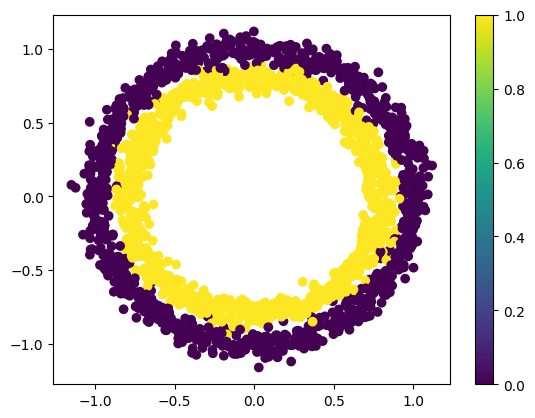

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=2048,
factor=0.8,
noise= 0.05)
plt.scatter(x[:,0], x[:,1], c=y)
plt.colorbar()

In [2]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x).float().to(device)
    self.y = torch.tensor(y).float().to(device)
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]
  def __len__(self): 
    return len(self.x)

In [4]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=64, shuffle=True)

In [5]:
model = nn.Sequential(
  nn.Linear(2, 8),
  nn.Sigmoid(),
  nn.Linear(8, 1),
  nn.Sigmoid(), # Sigmoid add for BCELoss
).to(device)

In [6]:
# !pip install torch_summary
from torchsummary import summary

In [7]:
summary(model, torch.zeros(1, 2));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─Sigmoid: 1-2                           [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
├─Sigmoid: 1-4                           [-1, 1]                   --
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


In [8]:
loss_func = nn.BCELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
  for ix, iy in dl:
    opt.zero_grad()
    loss_value = loss_func(model(ix), iy.unsqueeze(1))
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.detach().numpy())
end = time.time()
print(end - start)

0.9668753147125244


Text(0, 0.5, 'loss')

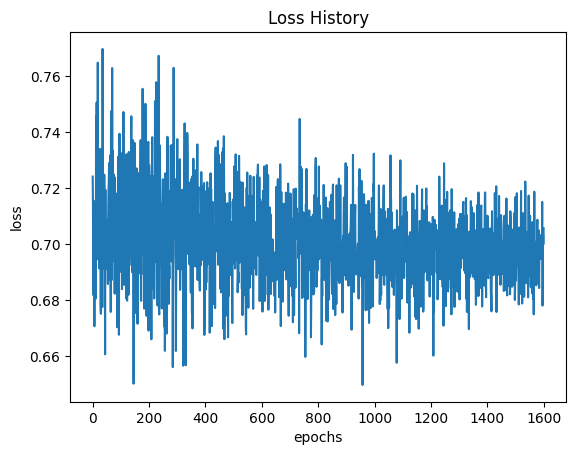

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.show
plt.title('Loss History')
plt.xlabel('epochs')
plt.ylabel('loss')

In [10]:
W = model.state_dict()
W

OrderedDict([('0.weight',
              tensor([[ 0.4365, -0.4903],
                      [-0.2797,  0.0494],
                      [-0.6273,  0.1710],
                      [ 0.0738,  0.2851],
                      [ 0.3001, -0.4071],
                      [ 0.4125,  0.1583],
                      [ 0.5007,  0.3501],
                      [-0.5963,  0.3212]])),
             ('0.bias',
              tensor([-0.0683,  0.5499,  0.6250,  0.1167, -0.4438,  0.2495, -0.4007, -0.1984])),
             ('2.weight',
              tensor([[ 0.2923,  0.1600, -0.3988,  0.2194,  0.2123,  0.2524,  0.2388, -0.1990]])),
             ('2.bias', tensor([-0.2346]))])